<img src = "https://github.com/VeryFatBoy/notebooks/blob/main/common/images/img_github_singlestore-jupyter_featured_2.png?raw=true">

<div id="singlestore-header" style="display: flex; background-color: rgba(235, 249, 245, 0.25); padding: 5px;">
    <div id="icon-image" style="width: 90px; height: 90px;">
        <img width="100%" height="100%" src="https://raw.githubusercontent.com/singlestore-labs/spaces-notebooks/master/common/images/header-icons/browser.png" />
    </div>
    <div id="text" style="padding: 5px; margin-left: 10px;">
        <div id="badge" style="display: inline-block; background-color: rgba(0, 0, 0, 0.15); border-radius: 4px; padding: 4px 8px; align-items: center; margin-top: 6px; margin-bottom: -2px; font-size: 80%">SingleStore Notebooks</div>
        <h1 style="font-weight: 500; margin: 8px 0 0 4px;">Using R with SingleStore Notebooks</h1>
    </div>
</div>

In [4]:
!conda install -y --quiet -c conda-forge r-irkernel r-rjava r-rjdbc r-ggplot2

Solving environment: ...working... done

# All requested packages already installed.



<div class="alert alert-block alert-warning">
    <b class="fa fa-solid fa-exclamation-circle"></b>
    <div>
        <p><b>Action Required</b></p>
        <p>Switch the kernel from Python to R before running the code below.</p>
    </div>
</div>

In [2]:
library(RJDBC)

Loading required package: DBI

Loading required package: rJava



In [3]:
# URL of the JDBC driver file
driver_url <- "https://repo1.maven.org/maven2/com/singlestore/singlestore-jdbc-client/1.2.1/singlestore-jdbc-client-1.2.1.jar"

# Set the JDBC driver class name
driver <- "com.singlestore.jdbc.Driver"

# Local directory to save the driver file
local_dir <- "jars"
dir.create(local_dir, showWarnings = FALSE, recursive = TRUE)

# Check if the driver file already exists
driver_file <- file.path(
    local_dir,
    "singlestore-jdbc-client-1.2.1.jar"
)

if (!file.exists(driver_file)) {
    # Download the JDBC driver file if it doesn't exist
    download.file(
        driver_url,
        destfile = driver_file,
        mode = "wb",
        quiet = TRUE
    )
}

# Check if the driver file has been downloaded successfully
if (file.exists(driver_file)) {
    print("Driver file downloaded successfully")
} else {
    print("Failed to download the driver file")
}

[1] "Driver file downloaded successfully"


In [4]:
host <- "<HOST>"
port <- 3306
database <- "iris_db"
user <- "admin"
password <- "<PASSWORD>"

url <- paste0("jdbc:singlestore://", host, ":", port, "/", database)

In [5]:
# Load the iris dataset
data(iris)

# Replace "." with "_" in column names
colnames(iris) <- gsub("\\.", "_", colnames(iris))

# Print the first few rows of the dataset
head(iris)

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [6]:
# Establish the JDBC connection
conn <- dbConnect(
    drv = JDBC(driver, driver_file),
    url = url,
    user = user,
    password = password
)

# Write the iris dataset to the database
dbWriteTable(conn, "iris", iris, overwrite = TRUE)

# Read the iris dataset from the database
iris_from_db <- dbReadTable(conn, "iris")

# Print the first few rows of the dataset read from the database
head(iris_from_db)

# Close the JDBC connection
dbDisconnect(conn)

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,6.1,3.0,4.6,1.4,versicolor
2,5.7,2.8,4.1,1.3,versicolor
3,4.4,3.0,1.3,0.2,setosa
4,5.7,4.4,1.5,0.4,setosa
5,6.4,2.8,5.6,2.2,virginica
6,6.0,3.0,4.8,1.8,virginica


[1] TRUE

In [7]:
library(ggplot2)

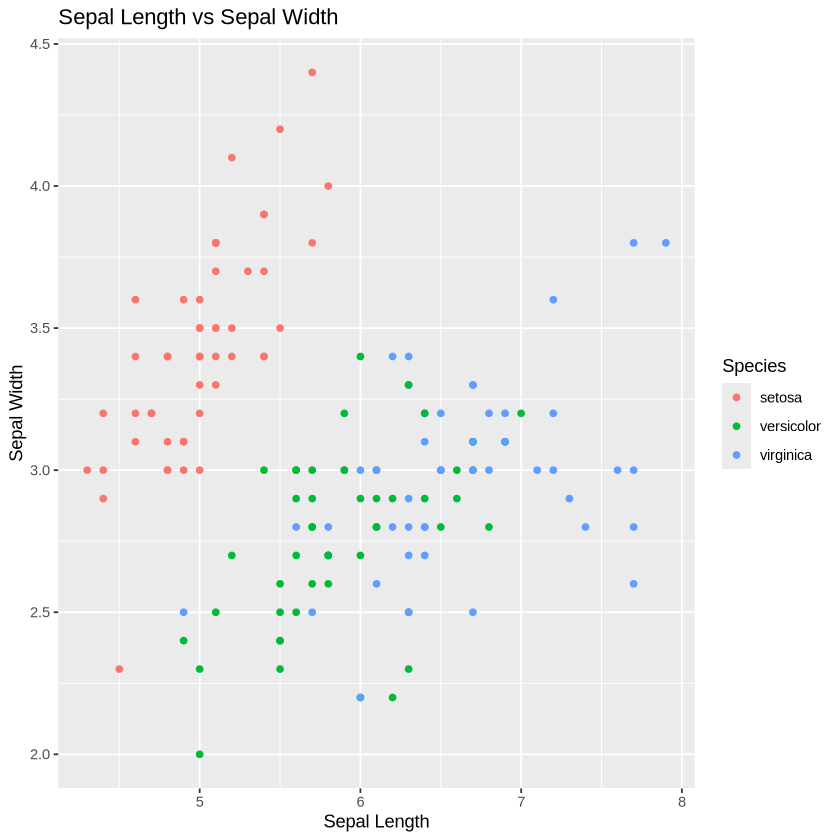

In [8]:
# Scatter plot of Sepal Length vs Sepal Width
ggplot(iris_from_db, aes(x = Sepal_Length, y = Sepal_Width, color = Species)) +
    geom_point() +
    labs(x = "Sepal Length", y = "Sepal Width", title = "Sepal Length vs Sepal Width")

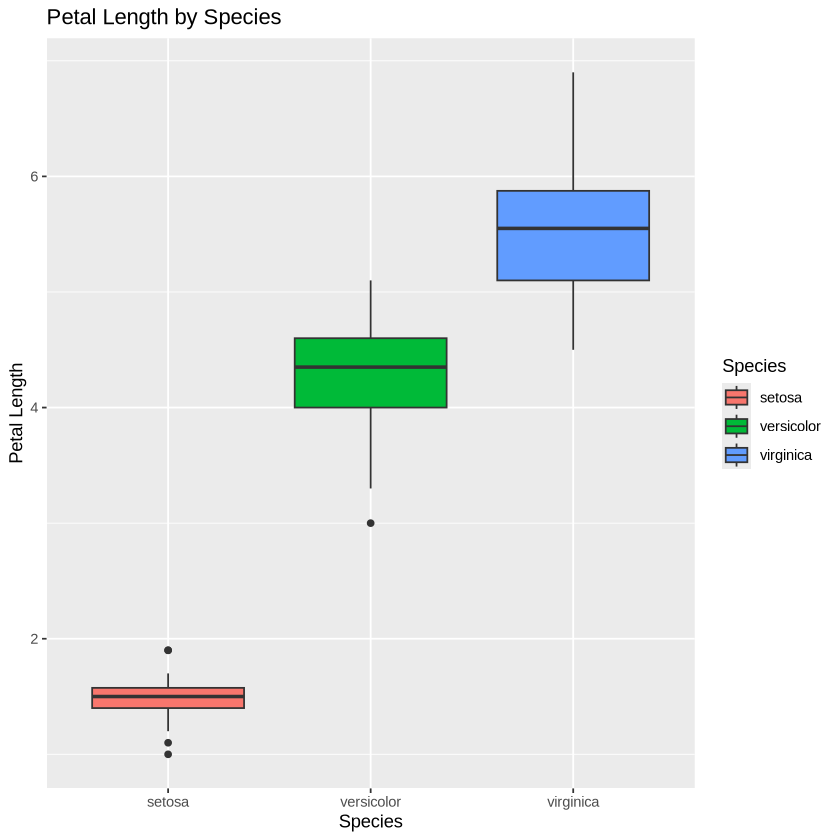

In [9]:
# Box plot of Petal Length by Species
ggplot(iris_from_db, aes(x = Species, y = Petal_Length, fill = Species)) +
    geom_boxplot() +
    labs(x = "Species", y = "Petal Length", title = "Petal Length by Species")

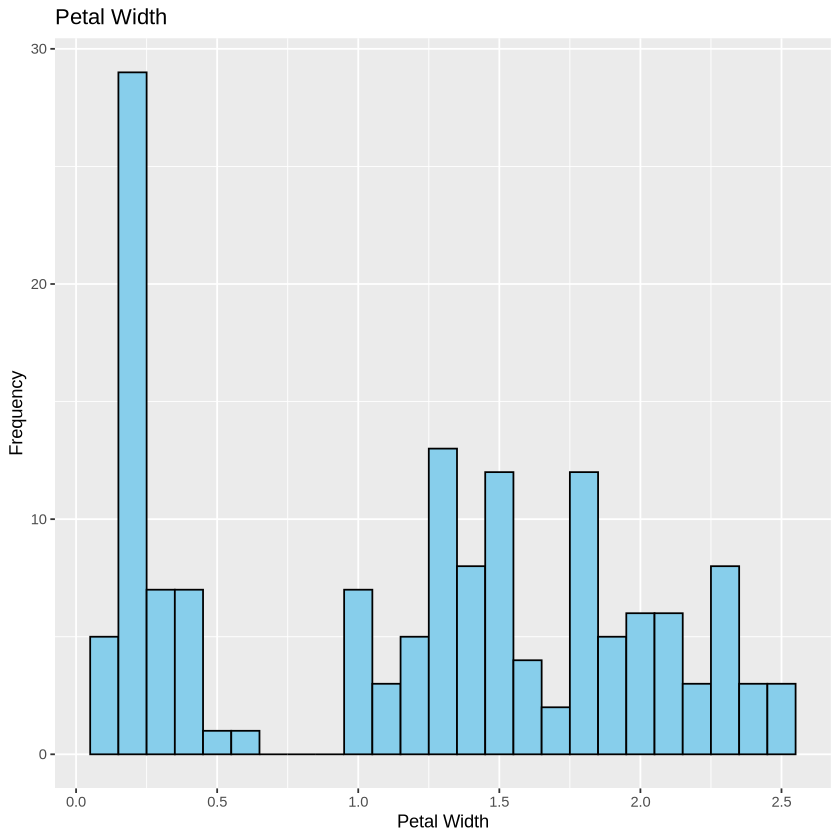

In [10]:
# Histogram of Petal Width
ggplot(iris_from_db, aes(x = Petal_Width)) +
    geom_histogram(binwidth = 0.1, fill = "skyblue", color = "black") +
    labs(x = "Petal Width", y = "Frequency", title = "Petal Width")